# Classification Error Metric Challenges
**Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users.
These reference the Classification Challenges.

## Challenge 1
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [34]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Prepare data
colnames = ['party','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution']+\
        ['physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban']+\
        ['aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending']+\
        ['superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
votes = pd.read_csv('house-votes-84.data', names=colnames)
votes.head()
# Replace strings with numerical values
y = votes['party']
X = votes.ix[:,1:].copy()
#X.replace({'y': 1, 'n': 0, '?':np.nan})
X.replace(to_replace=['y','n','?'], value=[1,0,np.nan], inplace=True)
X = X.apply(pd.to_numeric, axis=0)
meanvotes = X.T.mean()
X = X.T.fillna(meanvotes).T
X.head()
# Get rid of bad rows
tmp = pd.concat([y,X], axis=1).dropna(axis=0,how='any')
y = tmp['party']=='democrat'
X = tmp.ix[:,1:]

# Prepare classifiers
names = ['6 Nearest Neighbors', 'Logistic Regression', 'Gaussian NB', 'SVC', 'Decision Tree', 'Random Forest']
classifiers = [KNeighborsClassifier(n_neighbors=6), LogisticRegression(), GaussianNB(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier()]


for (name,mod) in zip(names, classifiers):
    print "%s accuracy: %.3f"%(name, np.mean(cross_val_score(mod,X,y)))
    print "%s precision: %.3f"%(name, np.mean(cross_val_score(mod,X,y, scoring='precision')))
    print "%s recall: %.3f"%(name, np.mean(cross_val_score(mod,X,y, scoring='recall')))
    print "%s F1: %.3f"%(name, np.mean(cross_val_score(mod,X,y, scoring='f1')))


6 Nearest Neighbors accuracy: 0.931
6 Nearest Neighbors precision: 0.969
6 Nearest Neighbors recall: 0.918
6 Nearest Neighbors F1: 0.942
Logistic Regression accuracy: 0.963
Logistic Regression precision: 0.970
Logistic Regression recall: 0.970
Logistic Regression F1: 0.970
Gaussian NB accuracy: 0.935
Gaussian NB precision: 0.948
Gaussian NB recall: 0.948
Gaussian NB F1: 0.948
SVC accuracy: 0.954
SVC precision: 0.981
SVC recall: 0.944
SVC F1: 0.962
Decision Tree accuracy: 0.954
Decision Tree precision: 0.955
Decision Tree recall: 0.951
Decision Tree F1: 0.956
Random Forest accuracy: 0.952
Random Forest precision: 0.973
Random Forest recall: 0.959
Random Forest F1: 0.962


## Challenge 2
For each, draw the ROC curve and calculate the AUC.

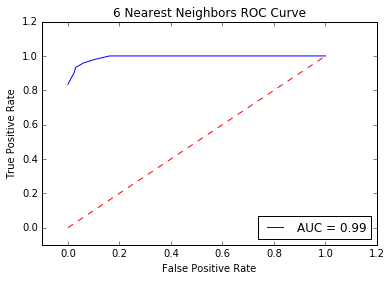

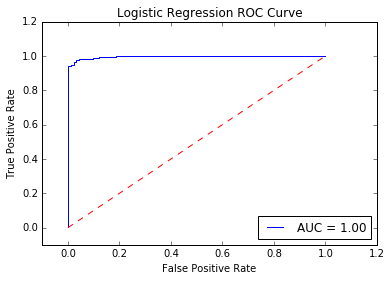

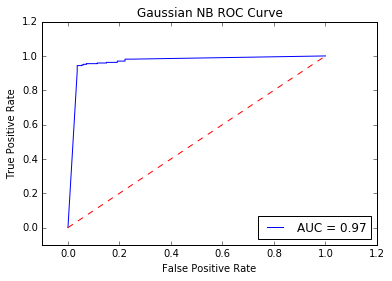

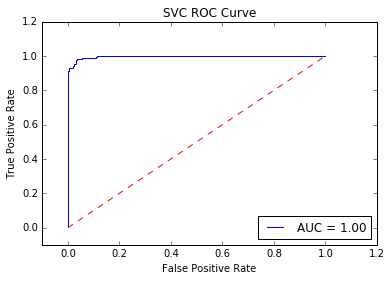

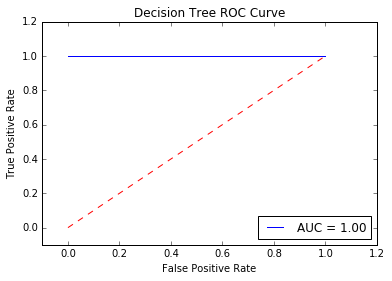

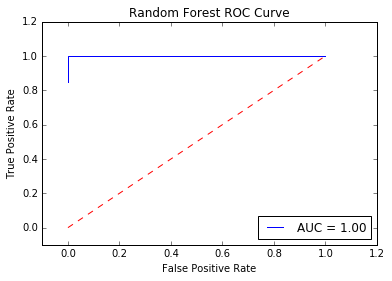

In [39]:
from sklearn.metrics import roc_curve, auc  
import matplotlib.pyplot as plt
%matplotlib inline

for (name,mod) in zip(names, classifiers):
    mod.fit(X,y)
    fpr, tpr, thresholds = roc_curve(y.values, mod.predict_proba(X)[:,1])
    roc_auc = auc(fpr, tpr)
          
    plt.title('%s ROC Curve'%name)
    plt.plot(fpr, tpr, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    
    

## Challenge 3
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [ ]:
# Whoops. I already used cross validation in part 1

## Challenge 4
For your movie classifiers, calculate the precision and recall for each class.

In [54]:
from sklearn.metrics import precision_score, recall_score

movies = pd.read_csv('2013_movies.csv')
movies['Month'] = movies['ReleaseDate'].astype(np.datetime64).apply(lambda x: x.month)
movies['Weekday'] = movies['ReleaseDate'].astype(np.datetime64).apply(lambda x: x.weekday())
movies.drop(movies['Rating']=='G', axis=0)
movies.dropna(axis=0,how='any', inplace=True)
movies.head()
y = movies['Rating']
X = movies[['Budget','DomesticTotalGross','Runtime','Month','Weekday']]


print "KNN"
mod = KNeighborsClassifier(n_neighbors=6)
mod.fit(X,y)
print "PG precision: %.3f"%(precision_score(y=='PG', mod.predict(X)=='PG'))
print "PG recall: %.3f"%(recall_score(y=='PG', mod.predict(X)=='PG'))
print "PG-13 precision: %.3f"%(precision_score(y=='PG-13', mod.predict(X)=='PG-13'))
print "PG-13 recall: %.3f"%(recall_score(y=='PG-13', mod.predict(X)=='PG-13'))
print "R precision: %.3f"%(precision_score(y=='R', mod.predict(X)=='R'))
print "R recall: %.3f"%(recall_score(y=='R', mod.predict(X)=='R'))
print ''

print 'Logistic Regression'
mod = LogisticRegression()
mod.fit(X,y)
print "PG precision: %.3f"%(precision_score(y=='PG', mod.predict(X)=='PG'))
print "PG recall: %.3f"%(recall_score(y=='PG', mod.predict(X)=='PG'))
print "PG-13 precision: %.3f"%(precision_score(y=='PG-13', mod.predict(X)=='PG-13'))
print "PG-13 recall: %.3f"%(recall_score(y=='PG-13', mod.predict(X)=='PG-13'))
print "R precision: %.3f"%(precision_score(y=='R', mod.predict(X)=='R'))
print "R recall: %.3f"%(recall_score(y=='R', mod.predict(X)=='R'))
print ''


def alwaysMode(X):
    return np.array([y.mode().iloc[0]]*len(X))
print 'Always mode'
print "PG precision: %.3f"%(precision_score(y=='PG', alwaysMode(X)=='PG'))
print "PG recall: %.3f"%(recall_score(y=='PG', alwaysMode(X)=='PG'))
print "PG-13 precision: %.3f"%(precision_score(y=='PG-13', alwaysMode(X)=='PG-13'))
print "PG-13 recall: %.3f"%(recall_score(y=='PG-13', alwaysMode(X)=='PG-13'))
print "R precision: %.3f"%(precision_score(y=='R', alwaysMode(X)=='R'))
print "R recall: %.3f"%(recall_score(y=='R', alwaysMode(X)=='R'))
    

KNN
PG precision: 0.400
PG recall: 0.286
PG-13 precision: 0.682
PG-13 recall: 0.750
R precision: 0.697
R recall: 0.697

Logistic Regression
PG precision: 0.000
PG recall: 0.000
PG-13 precision: 0.514
PG-13 recall: 0.925
R precision: 0.733
R recall: 0.333

Always mode
PG precision: 0.000
PG recall: 0.000
PG-13 precision: 0.460
PG-13 recall: 1.000
R precision: 0.000
R recall: 0.000


## Challenge 5
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

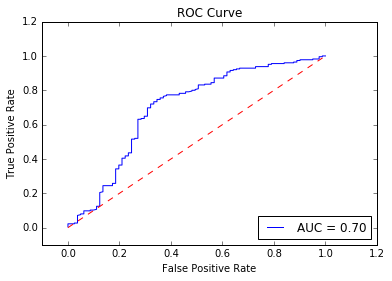

In [46]:
haberman = pd.read_csv('haberman.data', names=['Age', 'Year', 'Nodes', 'Survival'])
haberman.head()

# Use logistic regression to predict survival after 5 years. How well does your model do?
y = haberman['Survival']==1
X = haberman.drop('Survival', axis=1)
mod = LogisticRegression()

mod.fit(X,y)
fpr, tpr, thresholds = roc_curve(y.values, mod.predict_proba(X)[:,1])
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()